<a href="https://colab.research.google.com/github/averrise/averrise.github.io/blob/master/_post/fastai%26pytorch4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 119.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
fname = (path/"images").ls()[0]

In [6]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_112.jpg')

정규표현식

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['german_shorthaired']

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                 item_tfms = Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')

imageblock은 독립변수이고 category블록은 종속변수이다 또한 데이터블록으로 이미지를 GPU로 전달하여면 이미지가 모두 같은 크기여야 한다.

In [9]:
??using_attr

item_tfms는 데이터의 모든이미지를 같은 크기로 만들어줍니다. batch_tfms에 해당한다. 이건 임의의 부분을 잘라낸후 증강하는 단계이다.

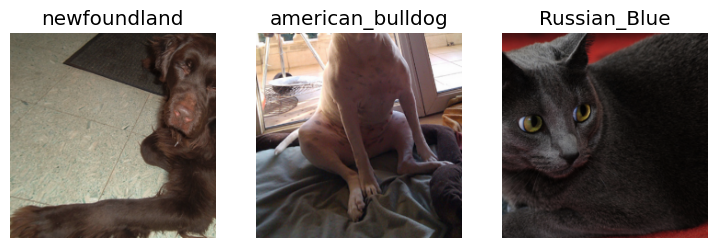

In [10]:
dls.show_batch(nrows= 1, ncols = 3)

In [11]:
learn = cnn_learner(dls,resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,1.529598,0.302285,0.098782,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.506243,0.276254,0.087280,00:13
1,0.343198,0.197013,0.058187,00:13


교차 엔트로피 손실

In [12]:
x, y = dls.one_batch()

In [13]:
y

TensorCategory([ 8,  0,  7, 13, 18, 15, 17, 16,  2, 29, 36, 23,  0, 25, 21,  0, 18, 19,  5, 18,  6, 20, 21, 15, 31, 17,  2, 19, 24,  9, 35,  9, 19, 22,  9,  3, 17, 24, 17,  3, 16, 26, 18, 14, 27, 14,
                33, 24, 24,  9, 24, 13, 27, 28, 10,  8, 18, 12,  6,  0,  1,  3,  3,  3], device='cuda:0')

위에 코드는 레이블링된 종속 변수

In [42]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([2.5153e-07, 4.3795e-08, 1.3564e-03, 4.9024e-08, 1.0583e-07, 5.8522e-09, 5.2372e-07, 3.6000e-06, 9.9863e-01, 4.8436e-07, 3.2397e-06, 1.4181e-06, 9.6893e-07, 3.4107e-08, 2.8024e-09, 1.2153e-07,
        3.4616e-07, 7.8111e-08, 1.7268e-08, 8.0807e-08, 3.9257e-08, 2.1978e-08, 1.6119e-07, 5.9452e-08, 4.2489e-08, 1.2984e-08, 1.9934e-08, 5.3763e-08, 4.2870e-07, 7.6476e-09, 2.1399e-07, 2.2230e-07,
        4.3242e-08, 3.5426e-09, 5.1226e-08, 6.1101e-08, 2.1595e-08])

In [15]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [16]:
acts = torch.randn((6,2))*2
acts

tensor([[-0.9916, -2.2545],
        [ 0.1560, -1.9368],
        [-0.6164,  1.1047],
        [-2.0798, -2.1778],
        [ 1.6429, -3.7728],
        [-1.2445, -2.9512]])

In [17]:
acts.sigmoid()

tensor([[0.2706, 0.0950],
        [0.5389, 0.1260],
        [0.3506, 0.7511],
        [0.1111, 0.1018],
        [0.8379, 0.0225],
        [0.2237, 0.0497]])

시그모이드는 행들을 합해서 모두 1이 되어야 함

In [18]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.7795, 0.8902, 0.1517, 0.5245, 0.9956, 0.8464])

In [19]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [20]:
sm_acts = torch.softmax(acts, dim = 1)
sm_acts

tensor([[0.7795, 0.2205],
        [0.8902, 0.1098],
        [0.1517, 0.8483],
        [0.5245, 0.4755],
        [0.9956, 0.0044],
        [0.8464, 0.1536]])

In [21]:
targ = tensor([0,1,0,1,1,0])

In [22]:
sm_acts

tensor([[0.7795, 0.2205],
        [0.8902, 0.1098],
        [0.1517, 0.8483],
        [0.5245, 0.4755],
        [0.9956, 0.0044],
        [0.8464, 0.1536]])

In [23]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.7795, 0.1098, 0.1517, 0.4755, 0.0044, 0.8464])

In [24]:
F.nll_loss(sm_acts, targ, reduction = 'none')

tensor([-0.7795, -0.1098, -0.1517, -0.4755, -0.0044, -0.8464])

In [25]:
F.cross_entropy(acts, targ)

tensor(1.7790)

In [26]:
nn.CrossEntropyLoss(reduction = 'none')(acts, targ)

tensor([0.2491, 2.2091, 1.8857, 0.7434, 5.4201, 0.1667])

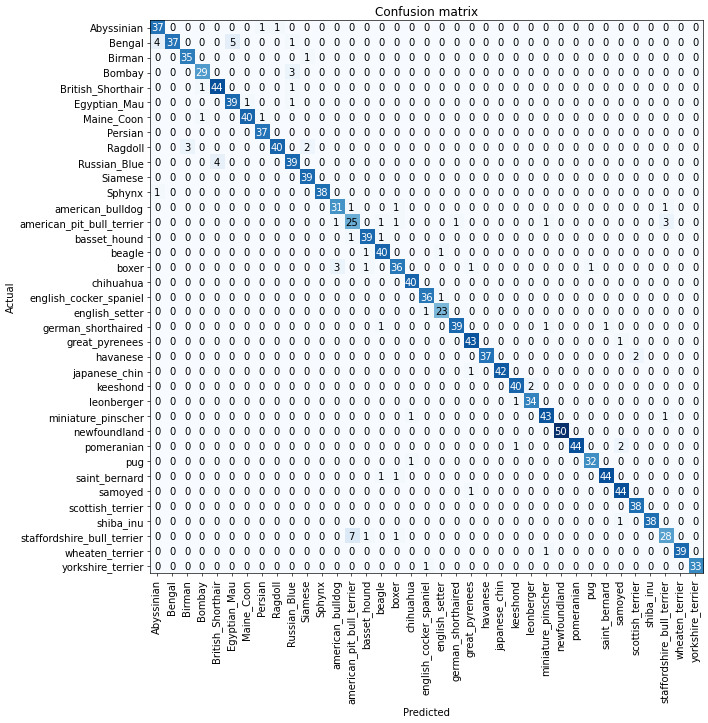

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (12, 12), dpi =60)

In [28]:
interp.most_confused(min_val = 5)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 5)]

In [29]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1, base_lr = 0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.797040,6.307588,0.554127,00:12


epoch,train_loss,valid_loss,error_rate,time
0,3.467392,2.441422,0.509472,00:13


ValueError: ignored

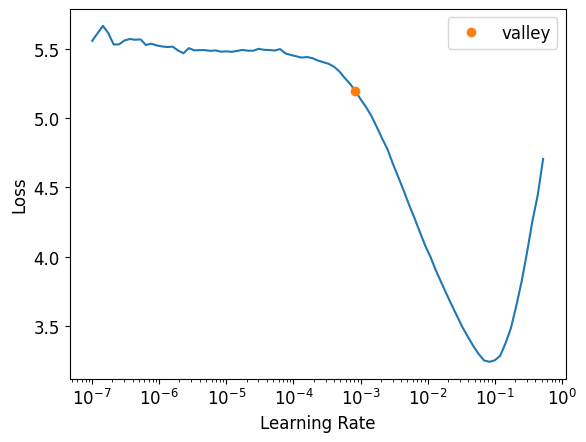

In [31]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
lr_min, lr_steep = learn.lr_find()

In [43]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1, base_lr = 1e-1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.623546,5.256974,0.541272,00:13


epoch,train_loss,valid_loss,error_rate,time
0,3.831819,2.824915,0.676590,00:13


In [33]:
learn.fine_tune??

In [34]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.157837,0.304890,0.103518,00:12
1,0.548202,0.219752,0.069012,00:12
2,0.328863,0.196206,0.059540,00:12


In [35]:
learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

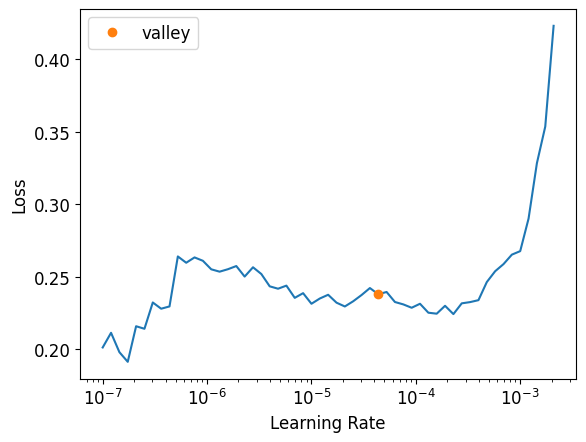

In [36]:
learn.lr_find()

In [37]:
learn.fit_one_cycle(6, lr_max = 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.263102,0.184097,0.058863,00:13
1,0.247055,0.183404,0.057510,00:13
2,0.228369,0.175906,0.054127,00:13
3,0.199126,0.172728,0.050744,00:13
4,0.198269,0.167906,0.050744,00:13
5,0.182316,0.166979,0.051421,00:13


In [38]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.189335,0.323229,0.102165,00:12
1,0.531570,0.256336,0.079161,00:12
2,0.325384,0.225679,0.063599,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.290987,0.218409,0.062246,00:13
1,0.263488,0.212012,0.064276,00:13
2,0.244485,0.213953,0.062923,00:13
3,0.217171,0.205745,0.058863,00:13
4,0.185708,0.200646,0.060217,00:13
5,0.168670,0.200844,0.060217,00:13
6,0.162494,0.198696,0.061570,00:13
7,0.153403,0.194219,0.058187,00:13
8,0.138717,0.190517,0.059540,00:13
9,0.135253,0.190630,0.056157,00:13


In [39]:
from fastai.callback.fp16 import*

In [40]:
learn = cnn_learner(dls, resnet50, metrics = error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs = 3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

epoch,train_loss,valid_loss,error_rate,time
0,1.255586,0.273571,0.094723,00:14
1,0.603847,0.258782,0.080514,00:14
2,0.436581,0.238901,0.083221,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.283917,0.212248,0.060217,00:16
1,0.323386,0.338030,0.098782,00:15
2,0.234118,0.229270,0.071042,00:15
3,0.167362,0.183255,0.057510,00:15
4,0.094252,0.156644,0.047361,00:15
5,0.056910,0.154785,0.045332,00:15
